In [54]:
from qiskit import *
from qiskit.providers.ibmq import least_busy

In [55]:
from qiskit.tools.visualization import plot_histogram

In [56]:
from qiskit.tools.monitor import job_monitor

In [57]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-23 00:09:19,499: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [58]:
quantum_register = QuantumRegister(2)

In [59]:
qbit_1 = quantum_register[0]

In [60]:
qbit_2 = quantum_register[1]

In [61]:
classical_register = ClassicalRegister(2)

In [62]:
bit_1 = classical_register[0]

In [63]:
bit_2 = classical_register[1]

In [64]:
circuit = QuantumCircuit(quantum_register, classical_register)

In [65]:
circuit.h(qbit_1)

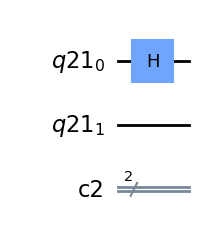

In [66]:
circuit.draw(output='mpl')

In [67]:
circuit.cx(qbit_1, qbit_2)

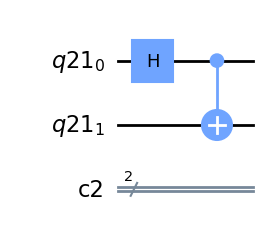

In [68]:
circuit.draw(output='mpl')

In [69]:
from qiskit.quantum_info import Statevector

In [70]:
state = Statevector.from_int(0, 2**2)

In [71]:
state = state.evolve(circuit)

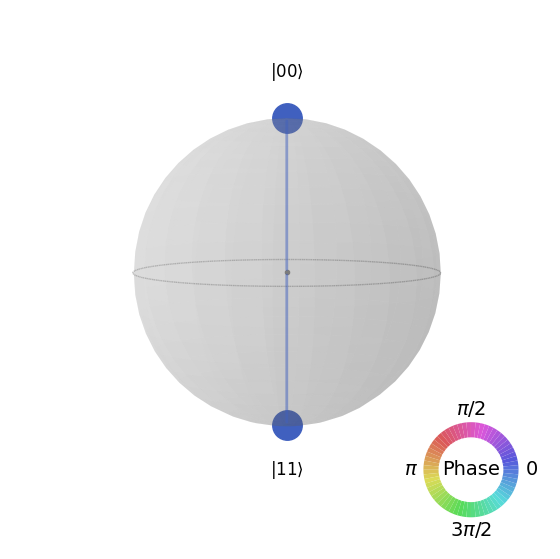

In [72]:
state.draw('qsphere')

In [73]:
circuit.measure(quantum_register, classical_register)

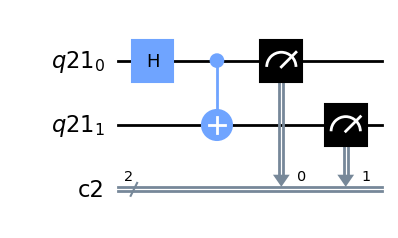

In [74]:
circuit.draw(output='mpl')

In [75]:
simulator = Aer.get_backend('qasm_simulator')

In [76]:
result = execute(circuit, backend = simulator).result()

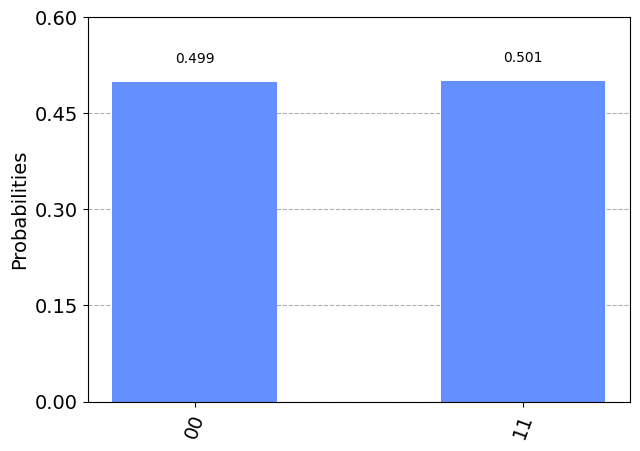

In [77]:
plot_histogram(result.get_counts(circuit))

In [78]:
provider = IBMQ.get_provider(hub='ibm-q')
devices = provider.backends(n_qubits=5, operational=True, simulator=False)
device = least_busy(devices)

In [79]:
job = execute(circuit, backend = device)

In [80]:
job_monitor(job)

Job Status: job has successfully run


In [81]:
result = job.result()

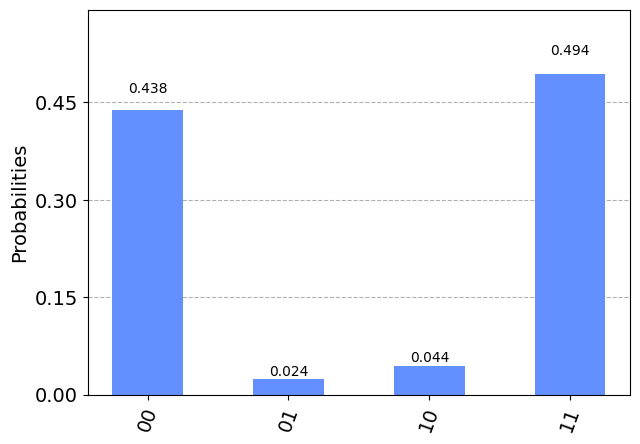

In [82]:
plot_histogram(result.get_counts(circuit))